In [1]:
# Karkovnyk Artem. KI-191

In [2]:
from cv2 import imread
from matplotlib.pyplot import imshow
from copy import copy

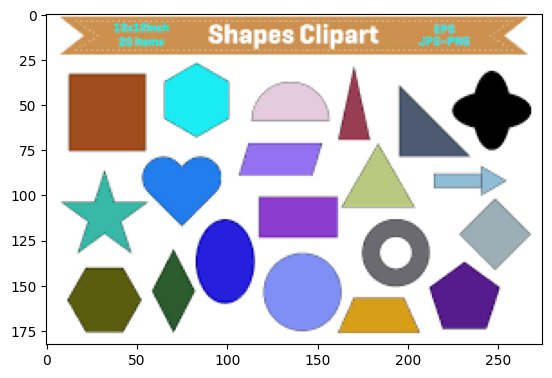

In [3]:
image = imread('test_image.png')
imshow(image)

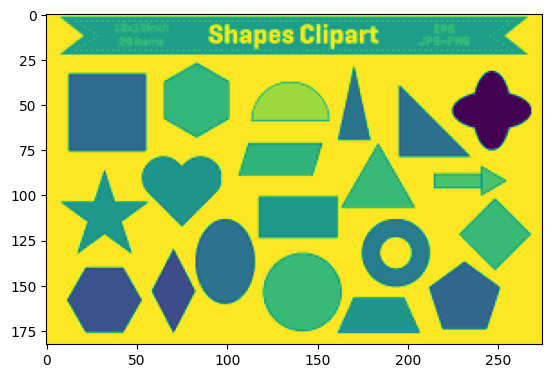

In [4]:
def to_grayscale(image):
    return image.sum(axis=2) / 3
gray = to_grayscale(image)
imshow(gray)

In [5]:
def search_objects(input_image):
    tmp = copy(input_image)
    
    def get_object(x, y):
        obj = set()
        if tmp[y][x] != 255:
            tmp[y][x] = 255
            obj.add((x, y))
            if x > 0:
                if y > 0:
                    obj = obj.union(get_object(x-1, y-1))
                if y < tmp.shape[0] - 1:
                    obj = obj.union(get_object(x-1, y+1))
            if x < tmp.shape[1] - 1:
                if y > 0:
                    obj = obj.union(get_object(x+1, y-1))
                if y < tmp.shape[0] - 1:
                    obj = obj.union(get_object(x+1, y+1))
        return obj
    
    objects = list()
    for y in range(tmp.shape[0]):
        for x in range(tmp.shape[1]):
            obj = get_object(x, y)
            if len(obj) > 0:
                
                objects.append(obj)
    return objects

def remove_objects_by_square(image, objects, square, color):
    for obj in objects:
        if len(obj) <= square:
            for pixel in obj:
                x, y = pixel
#                 print(x, y)
                image[y][x] = color


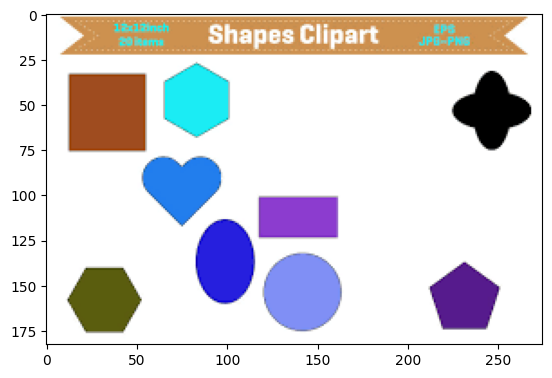

In [6]:
objects = search_objects(gray)
remove_objects_by_square(image, objects, 500, (255, 255, 255))
imshow(image)